## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('data_3.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [11]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [14]:
df.price = np.log1p(df.price)

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(full_train, test_size=0.25, random_state=1)


In [20]:
y_full_train = full_train.price.values
y_test = df_test.price.values
y_train = df_train.price.values
y_valid = df_valid.price.values


In [21]:
del full_train['price']
del df_test['price']
del df_valid['price']
del df_train['price']

Now, use `DictVectorizer` to turn train and validation into matrices:

In [23]:

from sklearn.feature_extraction import DictVectorizer


In [24]:
dv = DictVectorizer(sparse=False)


In [25]:
dict_full = full_train.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')
dict_train = df_train.to_dict(orient='records')
dict_valid = df_valid.to_dict(orient='records')


In [26]:
X_train = dv.fit_transform(dict_train)
X_valid = dv.transform(dict_valid)


## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [31]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [33]:

from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.feature_names_))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [0.98]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [1.03]



Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [34]:
from sklearn.ensemble import RandomForestRegressor


In [35]:

rf = RandomForestRegressor(n_estimators=10, random_state=1,
                                  n_jobs=-1)


In [36]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_test, y_pred, X_train):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    n = y_pred.shape[0]
    k = X_train.shape[1]
    
    adjusted = 1 - (1 - r2) * (n - 1) / (n - 1 - k)
    return rmse, r2, adjusted


In [42]:

y_pred = rf.predict(X_valid)

In [40]:
rmse, r2, r2_adj = metrics(y_valid, y_pred, X_valid)

In [41]:
rmse

0.03300477428445844

In [44]:
print(f"rmse: {rmse}; r2: {r2}; r2_adj: {r2_adj}")


rmse: 0.03300477428445844; r2: 0.5061874647685379; r2_adj: 0.5054287647758644


What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [46]:
scores = {}

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1,
                                  n_jobs=-1)
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_valid)
    rmse, r2, r2_adj = metrics(y_valid, y_pred, X_valid)
    
    scores[n] = (rmse, r2, r2_adj)


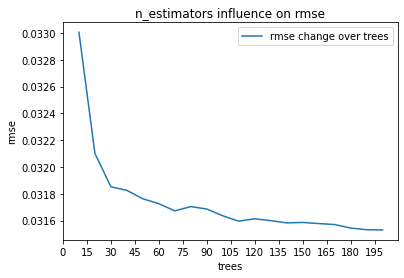

In [48]:
plt.plot(list(scores.keys()),
         list(map(lambda x: x[0], list(scores.values()))),
         label='rmse change over trees')

plt.title('n_estimators influence on rmse')
plt.xlabel('trees')
plt.ylabel('rmse')

plt.xticks(range(0, 201, 15))

plt.legend()
plt.show()


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [51]:
def calc_rf(X_train, y_train, X_valid, y_valid):
    scores = {}
    
    for d in [10, 15, 20, 25]:
    
        score = []
        
        for n in range(10, 201, 10):
            rf = RandomForestRegressor(
                n_estimators=n, max_depth=d,
                n_jobs=-1, random_state=1
            )

            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_valid)
            rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
            
            score.append(rmse)

        scores[d] = score
    
    return scores


In [52]:
result = calc_rf(X_train, y_train, X_valid, y_valid)


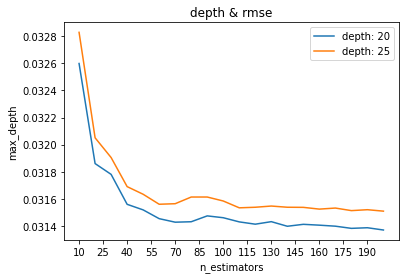

In [53]:
trees = list(range(10, 201, 10))

plt.plot(trees, result[20], label='depth: 20')
plt.plot(trees, result[25], label='depth: 25')

plt.xticks(range(10, 201, 15))
plt.title('depth & rmse')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

plt.legend()
plt.show()


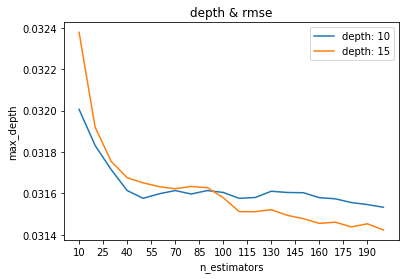

In [55]:
plt.plot(trees, result[10], label='depth: 10')
plt.plot(trees, result[15], label='depth: 15')

plt.xticks(range(10, 201, 15))
plt.title('depth & rmse')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

plt.legend()
plt.show()


What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [56]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20,
            random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [57]:
features = list(zip(dv.feature_names_, rf.feature_importances_))


In [58]:
df_features = pd.DataFrame(features,
                columns=['features', 'importance'])

df_features = df_features.sort_values(by='importance',
                            ascending=False)


In [59]:
df_features


,features,importance
12,room_type=Entire home/apt,0.373785
3,longitude,0.144779
2,latitude,0.142237
0,availability_365,0.077680
10,number_of_reviews,0.062915
11,reviews_per_month,0.061895
4,minimum_nights,0.047421
7,neighbourhood_group=Manhattan,0.037895
1,calculated_host_listings_count,0.034918
14,room_type=Shared room,0.006945


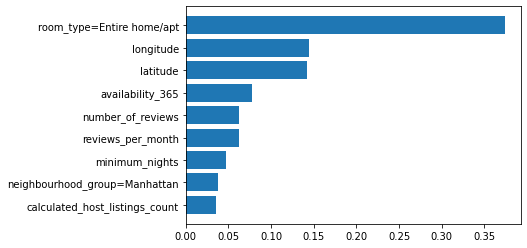

In [60]:

df_features = df_features[df_features.importance > 0.01]

num = len(df_features)

plt.barh(range(num), df_features.importance[::-1])
plt.yticks(range(num), df_features.features[::-1])

plt.show()


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

In [61]:
import xgboost as xgb


In [62]:
dtrain = xgb.DMatrix(X_train, label=y_train,
                feature_names=dv.feature_names_)

dvalid = xgb.DMatrix(X_valid, label=y_valid,
                feature_names=dv.feature_names_)


In [63]:
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]



In [64]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
            num_boost_round=175, evals=watchlist)


In [65]:
def parse_output(output):
    tree_list = []
    aucs_train = []
    aucs_valid = []
    
    for line in output.stdout.strip().split('\n'):
        tree, train, valid = line.split('\t')
        
        iteration = int(tree.strip('[]'))
        train = float(train.split(':')[1])
        valid = float(valid.split(':')[1])
        
        tree_list.append(iteration)
        aucs_train.append(train)
        aucs_valid.append(valid)
    
    return tree_list, aucs_train, aucs_valid


In [66]:
trees, train, valid = parse_output(output)


In [67]:
y_pred_03 = model.predict(dvalid)


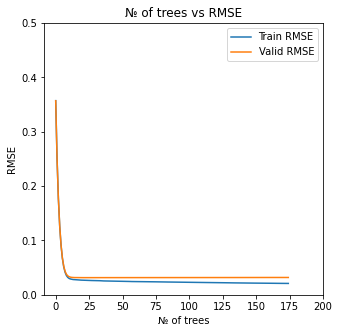

In [68]:
plt.figure(figsize=(5,5))
plt.plot(trees, train, label='Train RMSE')
plt.plot(trees, valid, label='Valid RMSE')
plt.xticks(range(0, 201, 25))

plt.ylim(0, 0.5)

plt.title('№ of trees vs RMSE')
plt.xlabel('№ of trees')
plt.ylabel('RMSE')

plt.legend()
plt.show()



In [69]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
            num_boost_round=175, evals=watchlist)


In [ ]:
In [179]:
y_pred_01 = model.predict(dvalid)
In [181]:
plt.figure(figsize=(5,5))
plt.plot(trees, train, label='Train RMSE')
plt.plot(trees, valid, label='Valid RMSE')
plt.xticks(range(0, 201, 25))

plt.ylim(0, 0.5)
plt.title('№ of trees vs RMSE')
plt.xlabel('№ of trees')
plt.ylabel('RMSE')

plt.legend()
plt.show()



In [70]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
            num_boost_round=175, evals=watchlist)


Now change `eta` first to `0.1` and then to `0.01`

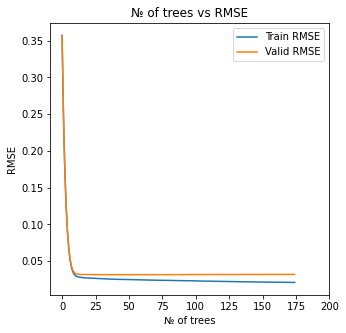

In [71]:
y_pred_001 = model.predict(dvalid)

plt.figure(figsize=(5,5))
plt.plot(trees, train, label='Train RMSE')
plt.plot(trees, valid, label='Valid RMSE')
plt.xticks(range(0, 201, 25))

# plt.ylim(0, 0.5)
plt.title('№ of trees vs RMSE')
plt.xlabel('№ of trees')
plt.ylabel('RMSE')

plt.legend()
plt.show()

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

